In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [56]:
df = pd.read_excel(r"C:\Users\gopic\Downloads\default_of_credit_card_clients_0.xlsx")
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [57]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [59]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

ID: 30000 unique values
LIMIT_BAL: 81 unique values
SEX: 2 unique values
EDUCATION: 7 unique values
MARRIAGE: 4 unique values
AGE: 56 unique values
PAY_0: 9 unique values
PAY_2: 9 unique values
PAY_3: 9 unique values
PAY_4: 9 unique values
PAY_5: 8 unique values
PAY_6: 8 unique values
BILL_AMT1: 22723 unique values
BILL_AMT2: 22346 unique values
BILL_AMT3: 22026 unique values
BILL_AMT4: 21548 unique values
BILL_AMT5: 21010 unique values
BILL_AMT6: 20604 unique values
PAY_AMT1: 7943 unique values
PAY_AMT2: 7899 unique values
PAY_AMT3: 7518 unique values
PAY_AMT4: 6937 unique values
PAY_AMT5: 6897 unique values
PAY_AMT6: 6939 unique values
default payment next month: 2 unique values


In [60]:
df['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

The steps that we are going to follow are:
1. EDA
2. Outlier removal
3. Visualization
4. Feature selection
5. Feature engineering
6. Statistics
6. Chi2 and MI
7. Model building

In [61]:
df['PAY_2'].value_counts()


PAY_2
0    25562
2     3927
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: count, dtype: int64

In [62]:

# ============================
# 1. Basic Info
# ============================

print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())




Shape of dataset: (30000, 25)

Data Types:
 ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

Missing values:
 ID                      

#### 2. Univariate Analysis

Check distribution of each variable.

Categorical: SEX, EDUCATION, MARRIAGE, default payment

Continuous: LIMIT_BAL, AGE, BILL_AMT*, PAY_AMT*

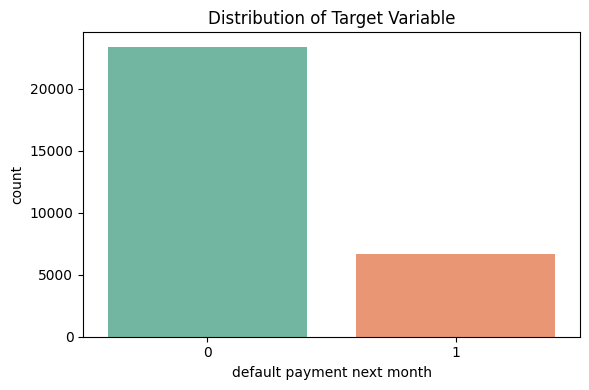

In [63]:
# ============================
# 2. Target Variable Distribution
# ============================

plt.figure(figsize=(6,4))
plt.title('Distribution of Target Variable')
sns.countplot(x='default payment next month', data=df , palette='Set2')
plt.tight_layout()
plt.show()

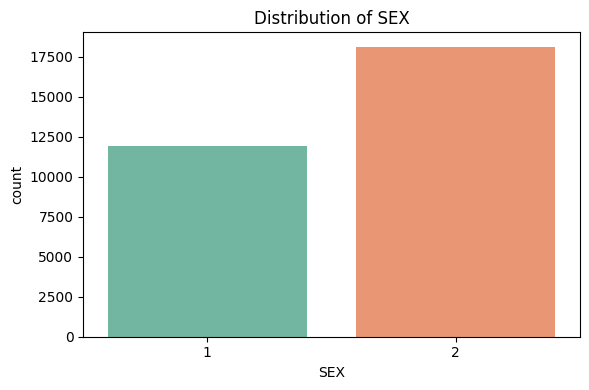

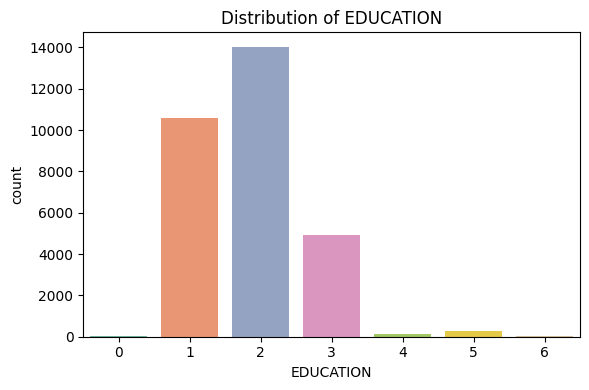

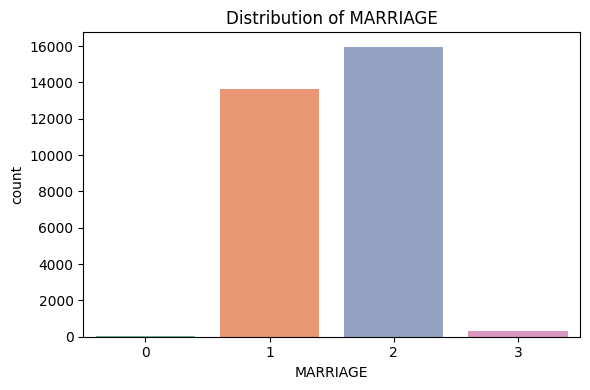

In [64]:
#Categorical variable Distribution
categorical_cols = ['SEX' , 'EDUCATION' , 'MARRIAGE' ]
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    plt.title(f'Distribution of {col}')
    sns.countplot(x=col, data=df , palette='Set2')
    plt.tight_layout()
    plt.show()

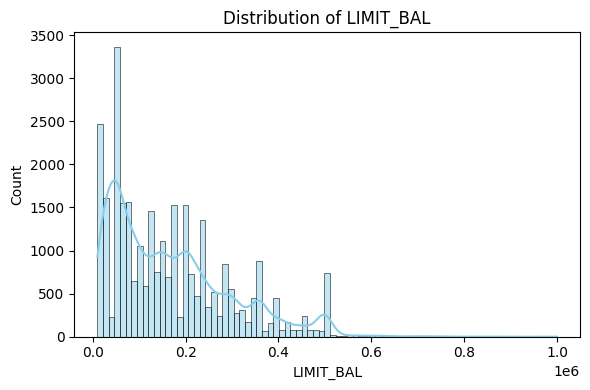

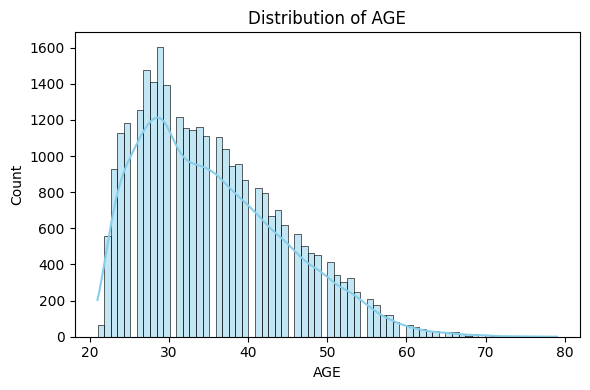

In [65]:
# Continuous variable Distribution
continuous_cols = ['LIMIT_BAL', 'AGE'] 
for col in continuous_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col] , kde=True , color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


#### ============================
#### 5. Bivariate Analysis
#### ============================

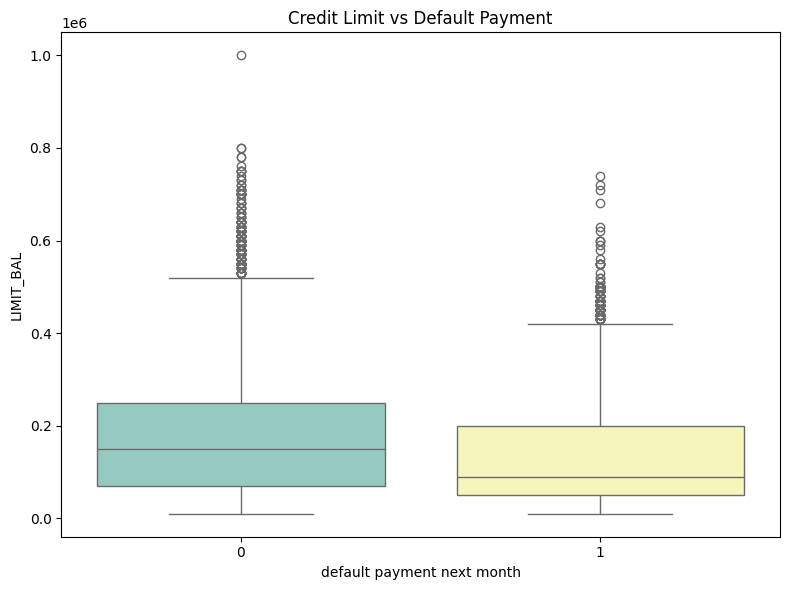

In [66]:
#Credit Limit vs Default
plt.figure(figsize=(8,6))
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df, palette='Set3')
plt.title('Credit Limit vs Default Payment')
plt.tight_layout()  
plt.show()

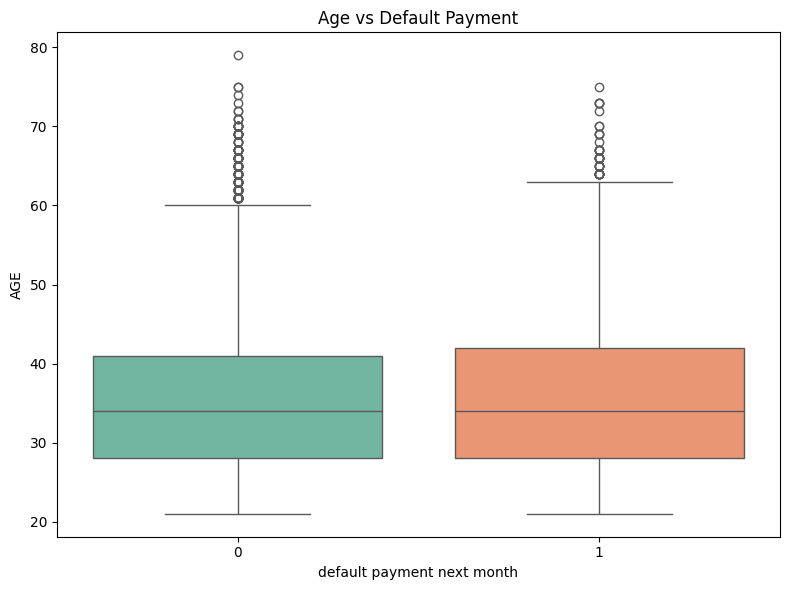

In [67]:
#Age vs Default
plt.figure(figsize=(8,6))
sns.boxplot(x='default payment next month', y='AGE', data=df, palette='Set2')
plt.title('Age vs Default Payment')
plt.tight_layout()
plt.show()

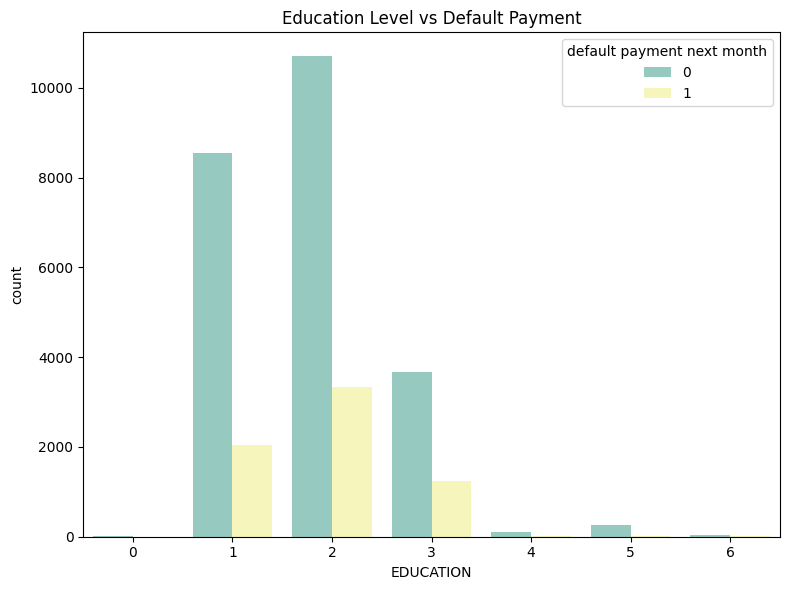

In [68]:
# Education vs Default
plt.figure(figsize=(8,6))
sns.countplot(x='EDUCATION', hue='default payment next month', data=df, palette='Set3')
plt.title('Education Level vs Default Payment')
plt.tight_layout()
plt.show()

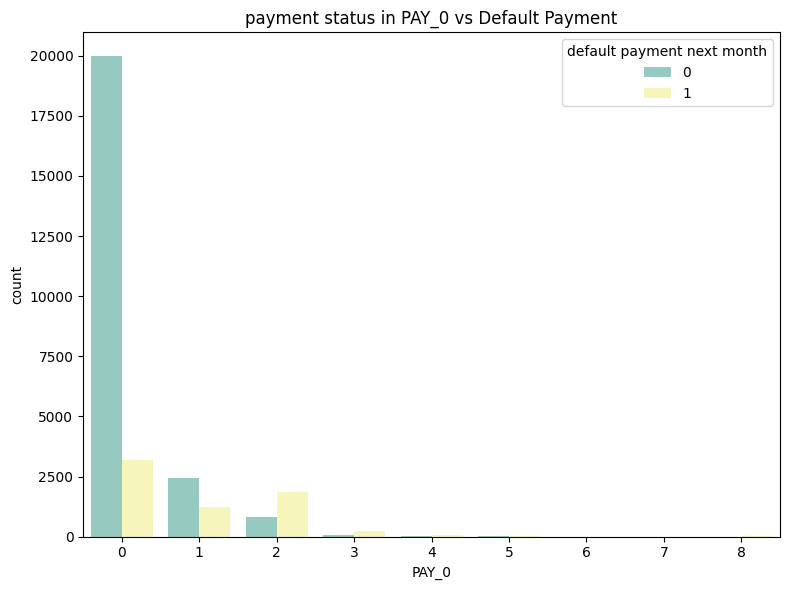

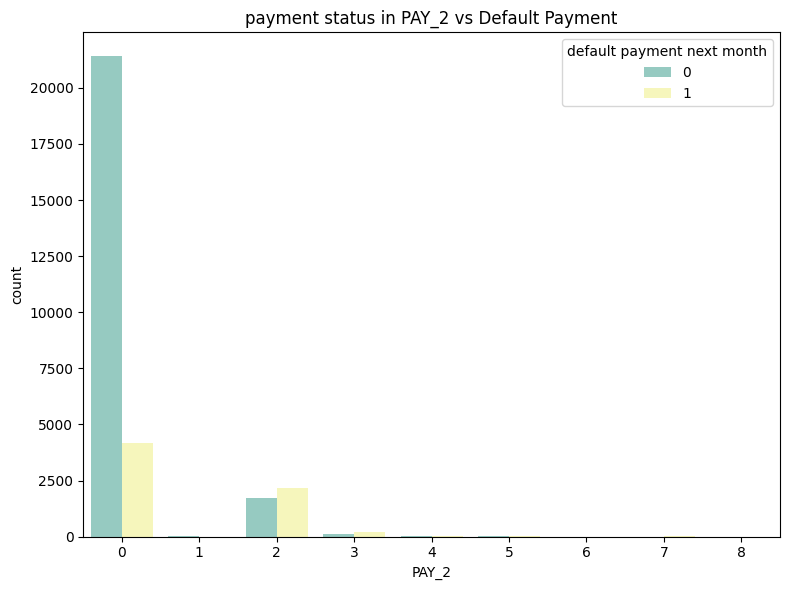

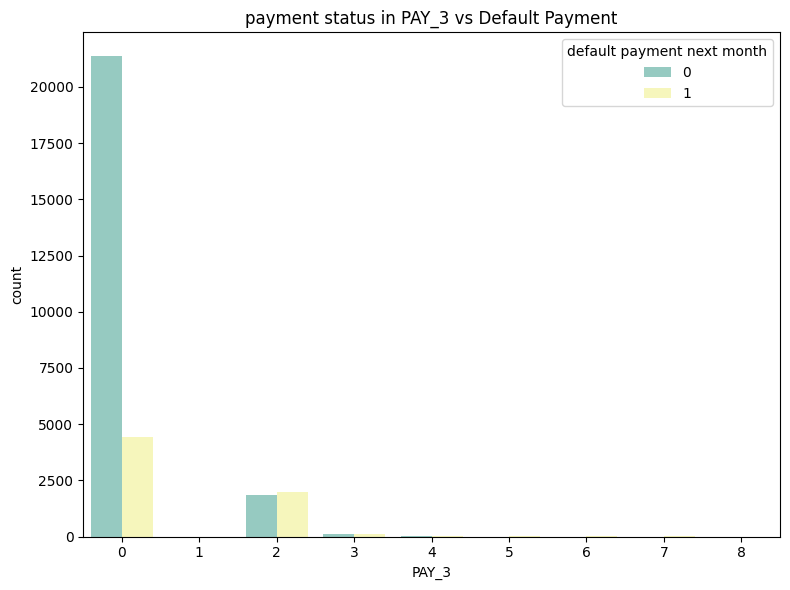

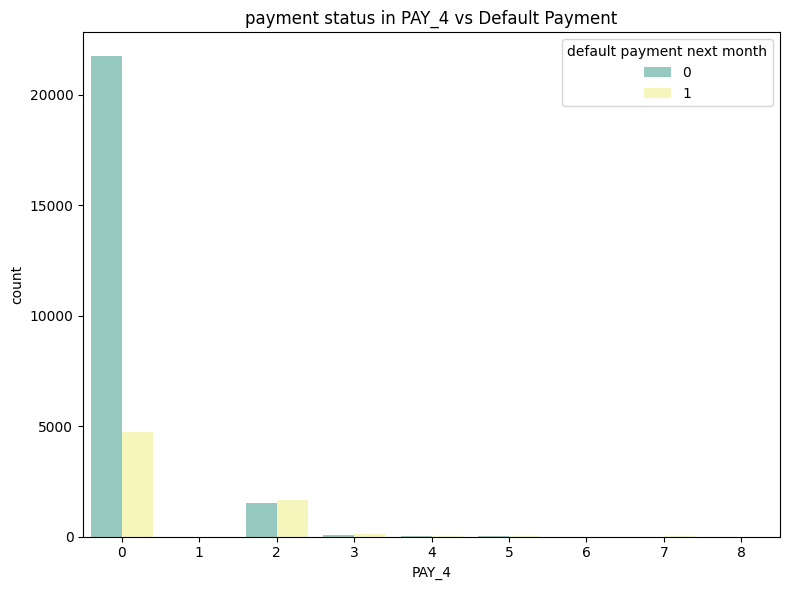

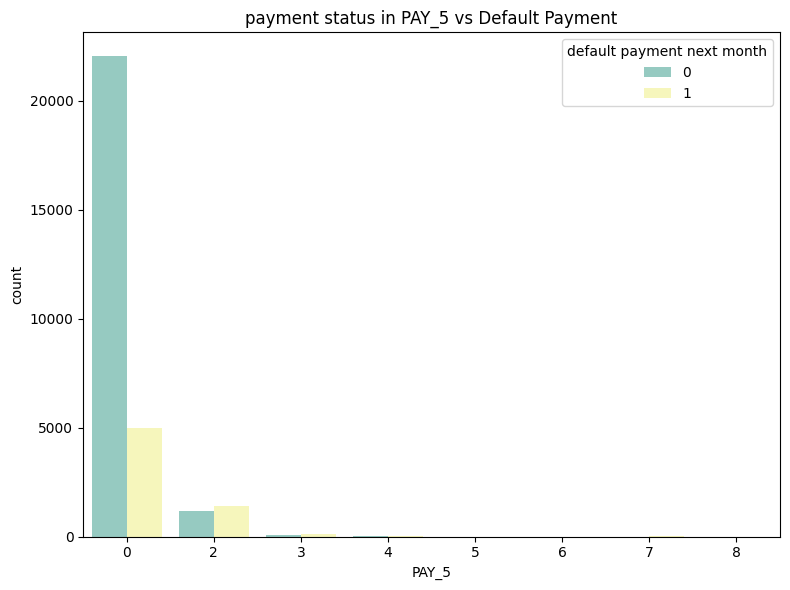

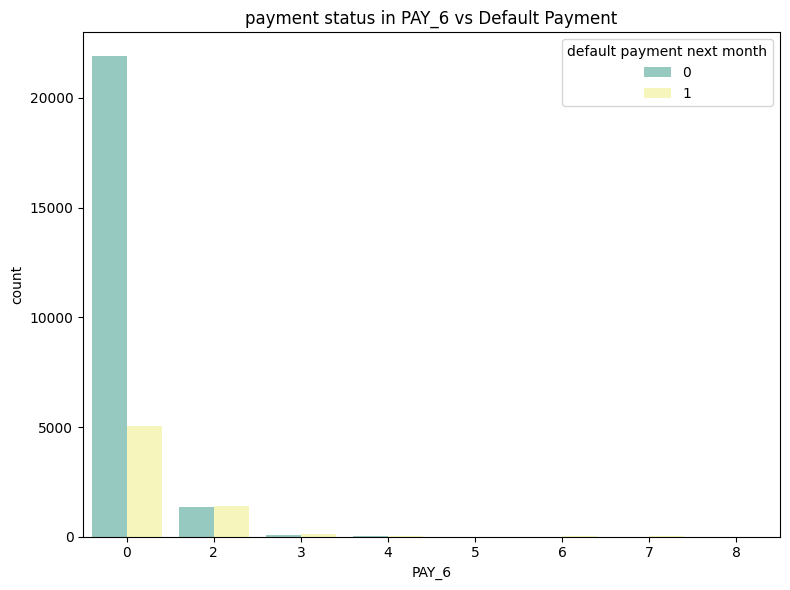

In [69]:
# Payement Status vs Default
pay_cols = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]

for col in pay_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, hue='default payment next month', data=df, palette='Set3')
    plt.title(f'payment status in {col} vs Default Payment')    
    plt.tight_layout()
    plt.show()


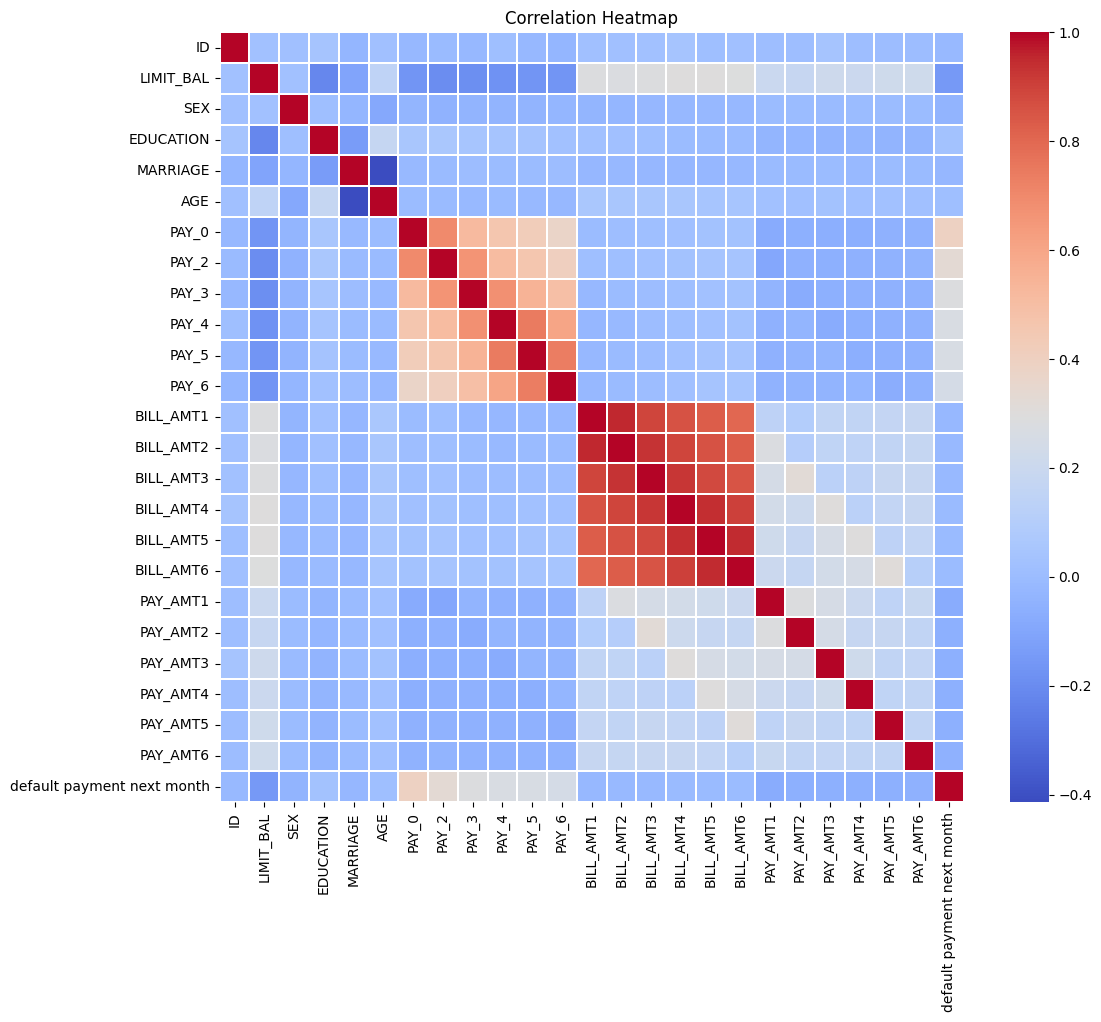

In [70]:
# Correlation Heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr , annot= False , fmt=".2f" , cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Heatmap')
plt.show()

##### TREND ANALYSIS(BILLS AND PAYMENTS)

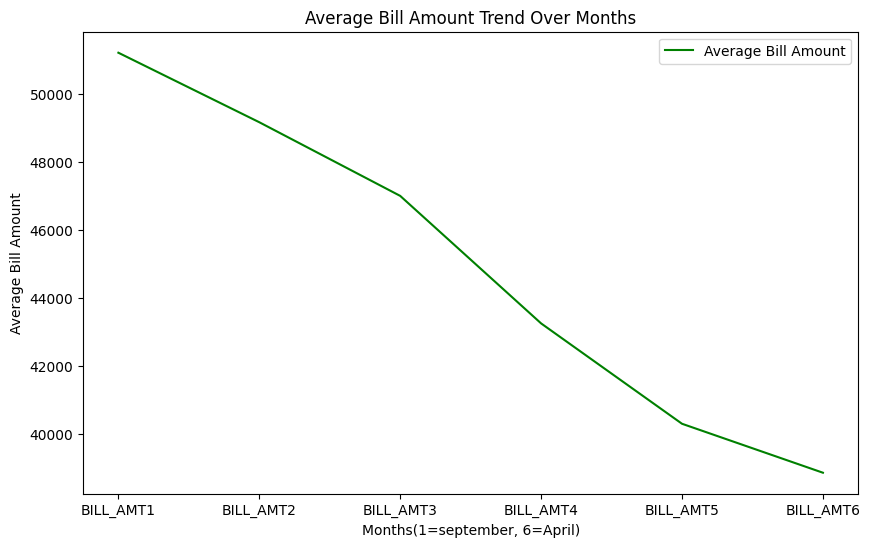

In [71]:
# Avarage bill Amount Trend

bill_cols = ["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]

avg_bills = df[bill_cols].mean()
plt.figure(figsize=(10,6))
sns.lineplot(x=bill_cols , y=avg_bills.values , markers='o' , color='green', label='Average Bill Amount')
plt.title('Average Bill Amount Trend Over Months')
plt.xlabel('Months(1=september, 6=April)')
plt.ylabel('Average Bill Amount')
plt.legend()
plt.show()


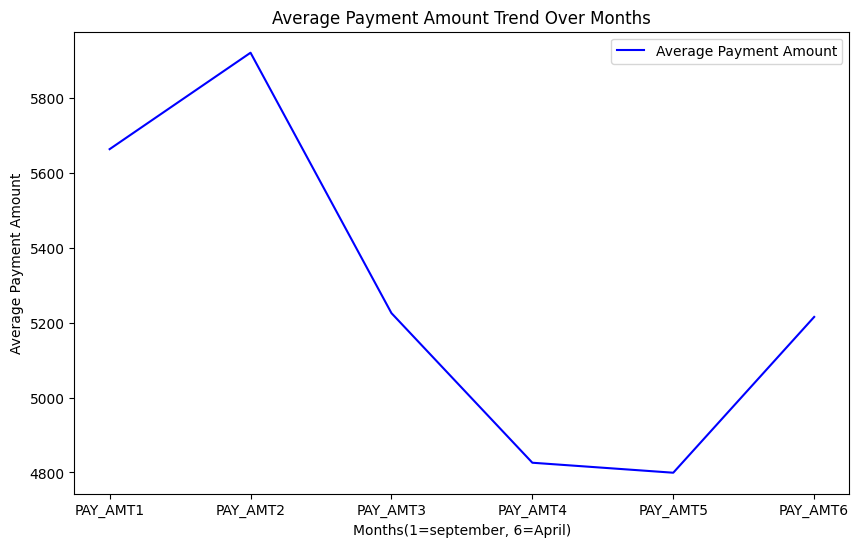

In [72]:
# Average payment Amount Trend  
pay_cols = ["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]

avg_payments = df[pay_cols].mean()
plt.figure(figsize=(10,6))
sns.lineplot(x=pay_cols , y=avg_payments.values , markers='o' , color='blue', label='Average Payment Amount')
plt.title('Average Payment Amount Trend Over Months')
plt.xlabel('Months(1=september, 6=April)')
plt.ylabel('Average Payment Amount')
plt.legend()
plt.show()

#### OUTERLIER DETECTION AND REMOVAL

In [73]:
df1 = df.copy()
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


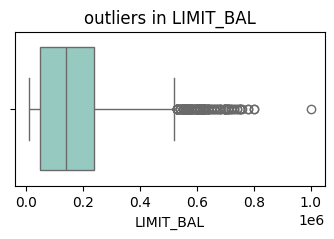

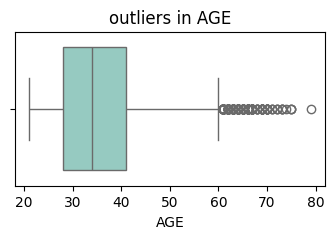

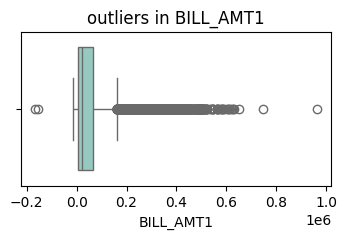

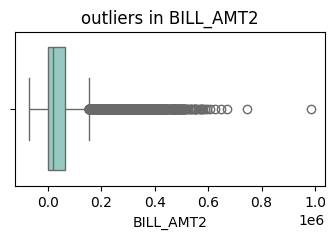

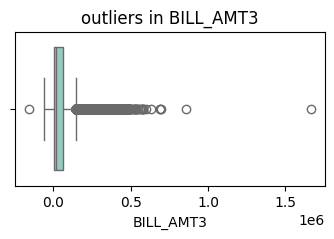

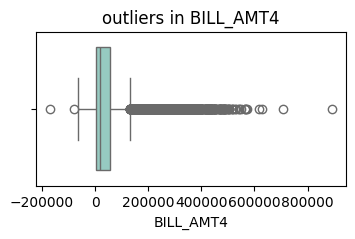

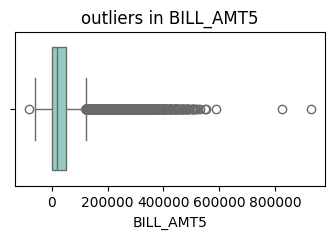

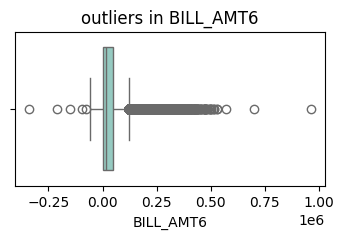

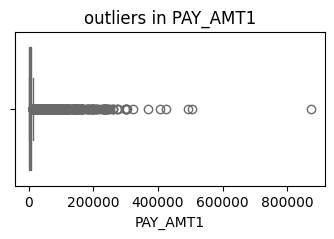

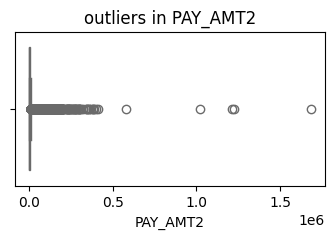

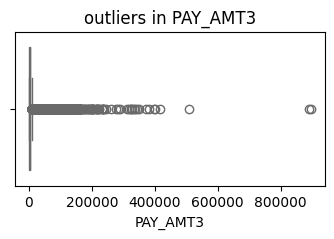

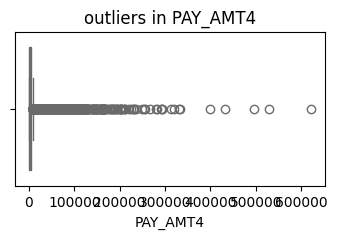

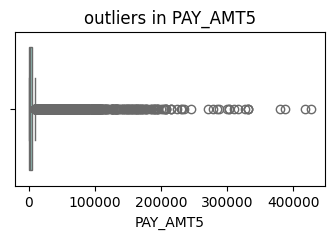

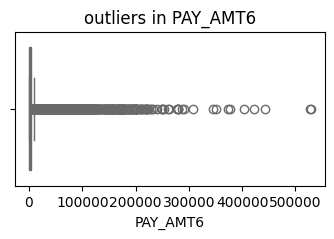

In [74]:
out_columns = ['LIMIT_BAL' , 'AGE' , 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
               'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

for col in out_columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=df1[col], palette='Set3')
    plt.title(f'outliers in {col}')
    plt.show()

In [75]:
def outlier_detection(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Get only the outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


In [76]:
outliers1 = outlier_detection(df1 , 'AGE')
outliers1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
102,103,480000,1,1,1,63,0,0,0,2,...,487066,471145,469961,16078,55693,17000,0,18000,24200,0
246,247,250000,2,2,1,75,0,0,0,0,...,1010,5572,794,1631,1536,1010,5572,794,1184,0
366,367,50000,2,2,1,61,0,0,0,0,...,23319,23171,24774,3000,2237,975,1000,2000,1039,0
387,388,80000,1,3,1,73,0,0,0,2,...,70646,72870,75018,3500,4330,3500,3500,3500,5100,1
1029,1030,30000,2,2,1,67,2,2,0,0,...,29499,30124,26855,0,1500,2182,1200,0,2302,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29163,29164,360000,2,3,1,73,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29171,29172,510000,2,3,1,61,0,0,0,2,...,181801,178179,223100,8500,17000,0,6508,50000,7000,0
29173,29174,360000,2,1,1,64,0,0,0,0,...,0,5640,0,4900,0,0,5640,0,0,0
29175,29176,160000,2,3,1,74,0,0,0,0,...,16905,0,19789,3783,2268,16905,0,19789,26442,0


In [77]:
import numpy as np

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace values outside bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df


In [78]:
outlier_dict = {}

for col in out_columns:
    outlier_dict[col] = remove_outliers(df1 , col)

    

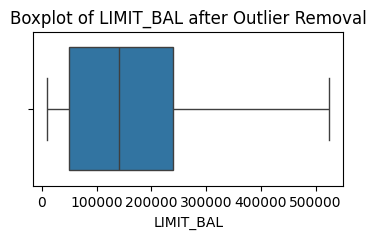

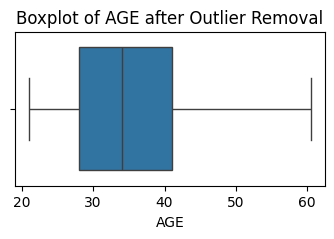

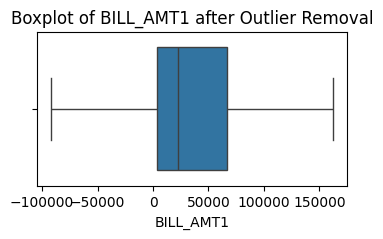

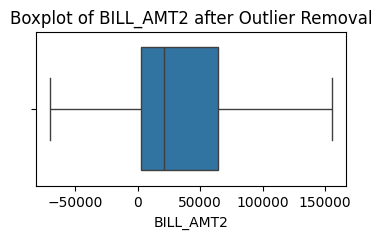

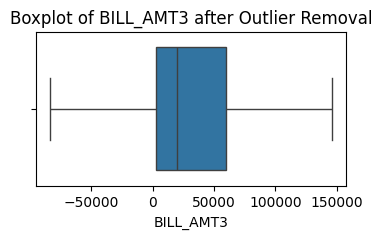

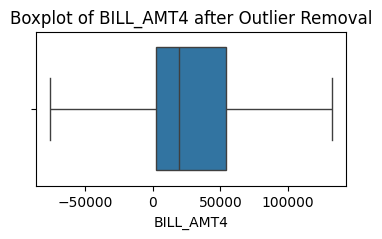

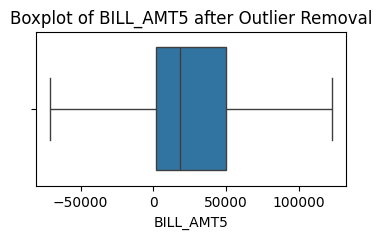

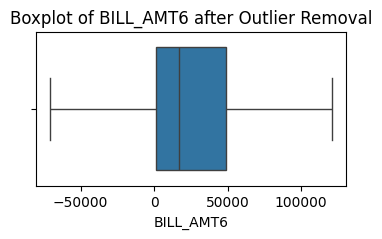

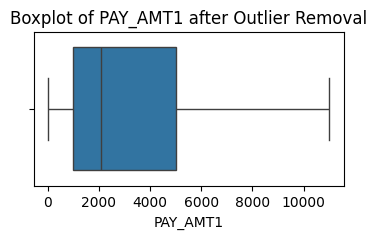

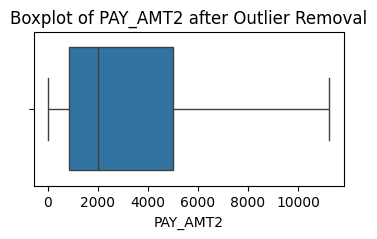

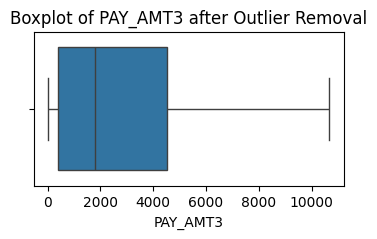

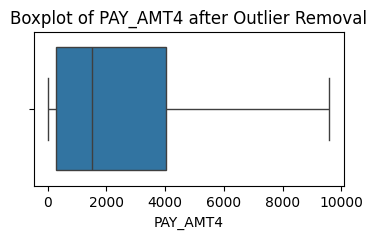

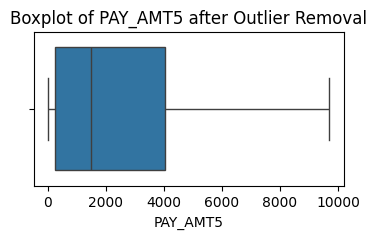

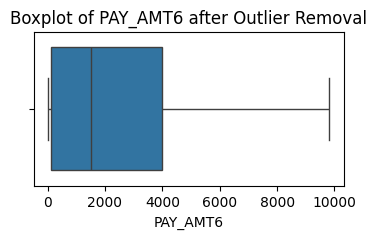

In [79]:
for col in out_columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(x = df1[col])
    plt.title(f'Boxplot of {col} after Outlier Removal')
    plt.show()

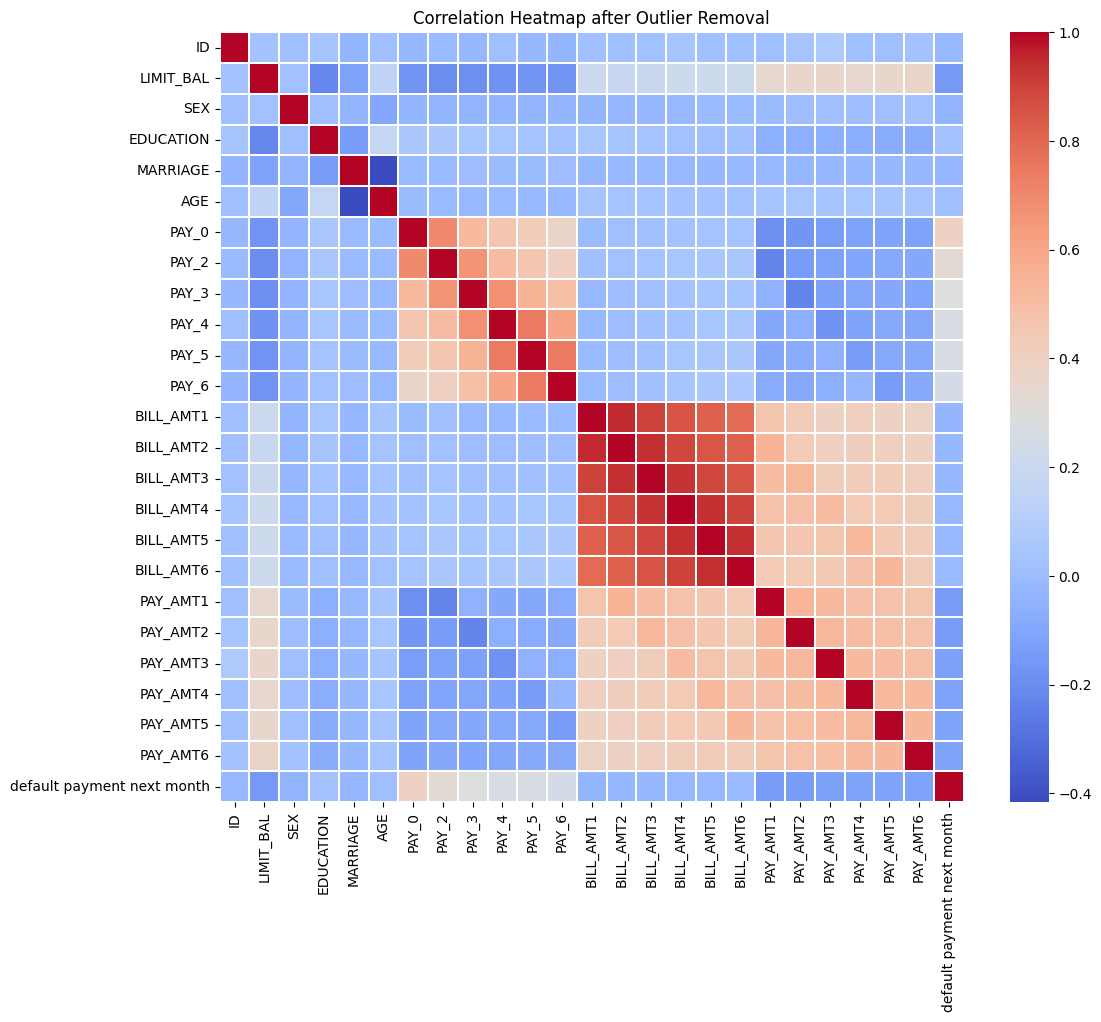

In [80]:
#correlation heatmap after outlier removal
corr = df1.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr , annot= False , fmt=".2f" , cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Heatmap after Outlier Removal')
plt.show()

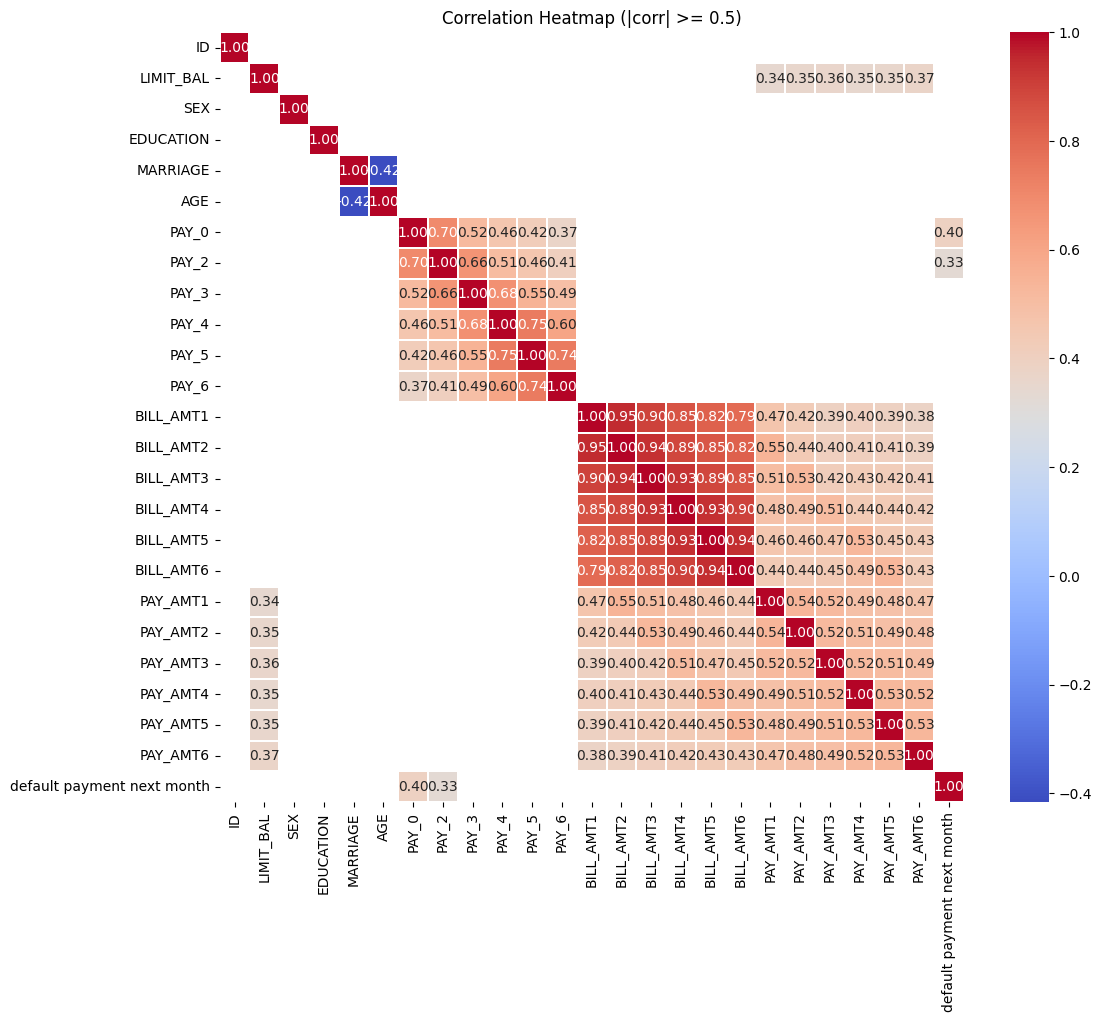

In [81]:
corr - df1.corr(numeric_only=True)

threshold = 0.3

mask = np.abs(corr) < threshold

plt.figure(figsize=(12,10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Heatmap (|corr| >= 0.5)')    
plt.show()

CATEGORICAL COLUMNS

In [82]:
categorical_cols = ['SEX' , 'EDUCATION' , 'MARRIAGE' ]

for col in categorical_cols:
    print(f'\n------{col}-----')
    print(df1[col].value_counts())


------SEX-----
SEX
2    18112
1    11888
Name: count, dtype: int64

------EDUCATION-----
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

------MARRIAGE-----
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


In [83]:
# croostab distribution for categorical columns
for col in categorical_cols:
    print(f'\n-----{col}-----')
    print(pd.crosstab(df1[col] , df1['default payment next month'] , normalize='index'))


-----SEX-----
default payment next month         0         1
SEX                                           
1                           0.758328  0.241672
2                           0.792237  0.207763

-----EDUCATION-----
default payment next month         0         1
EDUCATION                                     
0                           1.000000  0.000000
1                           0.807652  0.192348
2                           0.762651  0.237349
3                           0.748424  0.251576
4                           0.943089  0.056911
5                           0.935714  0.064286
6                           0.843137  0.156863

-----MARRIAGE-----
default payment next month         0         1
MARRIAGE                                      
0                           0.907407  0.092593
1                           0.765283  0.234717
2                           0.790717  0.209283
3                           0.739938  0.260062


From the above result we can conclude that all the categorical columns =['SEX' , 'EDUCATION' , 'MARRAIGE']  are highly predictive because of higher gap between in rates

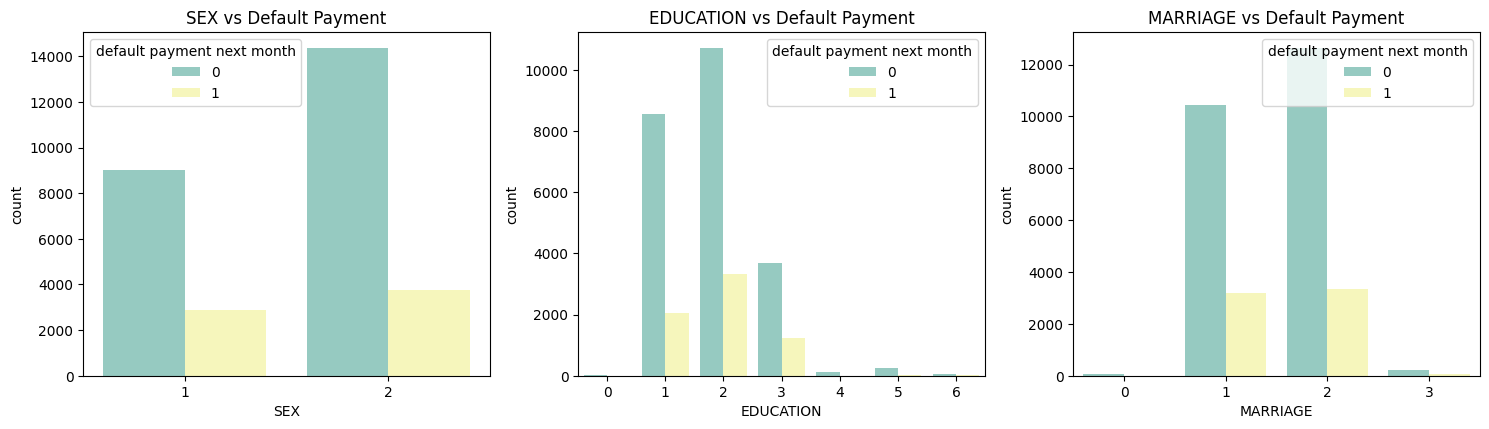

In [84]:
plt.figure(figsize=(15,12))
for i , col  in enumerate (categorical_cols , 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='default payment next month', data=df1 ,palette='Set3')
    plt.title(f'{col} vs Default Payment')
plt.tight_layout()  
plt.show()

CHI-SQUARE TEST AND MUTUAL INFORMATION TEST (MI)

In [ ]:
df2 = df1.copy()

# CHI-SQUARE TEST AND MUTUAL INFORMATION TEST (MI)

from sklearn.feature_selection import chi2 , mutual_info_classif
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['SEX' , 'EDUCATION' , 'MARRIAGE' ]

le = LabelEncoder()

for col in categorical_cols:
    df2[col] = le.fit_transform(df[col])

x_cat = df2[categorical_cols]
y = df2['default payment next month']    

chi2_score , p_value = chi2(x_cat, y)

chi_result = pd.DataFrame({
    'Feature' : categorical_cols,
    'Chi2 Score' : chi2_score,
}).sort_values(by='Chi2 Score' , ascending=False)

print(chi_result)


#Higher Chi2 Score → stronger relationship with target.
#p-value < 0.05 → statistically significant.


     Feature  Chi2 Score   p-value
0        SEX   18.983326  0.000013
1  EDUCATION    7.931259  0.004859
2   MARRIAGE    3.120010  0.077336


MUTUAL INFORMATION TEST(MI):

In [86]:
from sklearn.feature_selection import mutual_info_classif

mi_score = mutual_info_classif(x_cat, y, discrete_features=True)    

mi_result = pd.DataFrame({
    'Feature' : categorical_cols,
    'Mutual Information Score' : mi_score
})

print(mi_result)

#Higher MI Score = more predictive power.

     Feature  Mutual Information Score
0        SEX                  0.000793
1  EDUCATION                  0.003078
2   MARRIAGE                  0.000610


In [87]:
feature_importance = pd.merge(chi_result[['Feature' , 'Chi2 Score']],
                            mi_result,
                            on='Feature').sort_values(by='Mutual Information Score' , ascending=False)

print(feature_importance)

     Feature  Chi2 Score  Mutual Information Score
1  EDUCATION    7.931259                  0.003078
0        SEX   18.983326                  0.000793
2   MARRIAGE    3.120010                  0.000610


From the above result we can conclude that :

1. EDUCATION :- Best among the three , keeping it

2. SEX :-  It is statistically significant, though MI shows weak contribution

3. MARRAIGE :- Very weak , so droping it

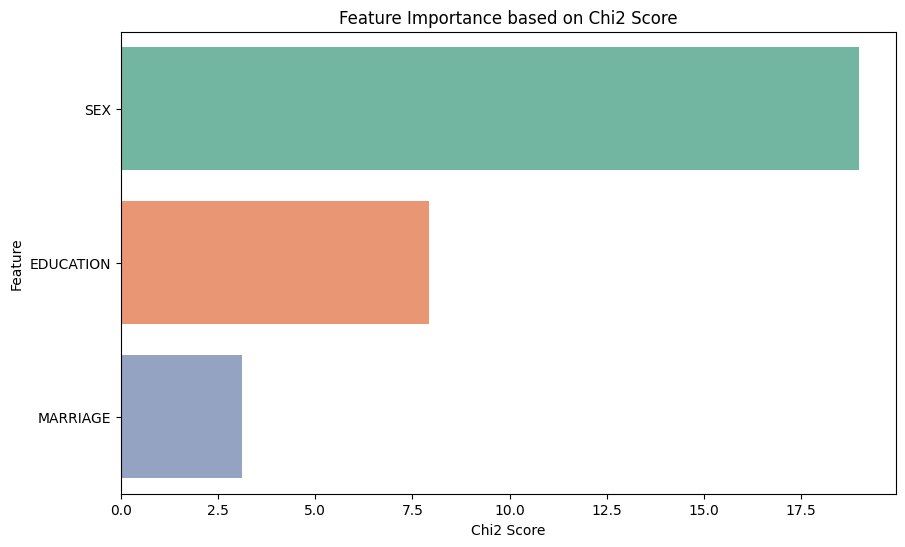

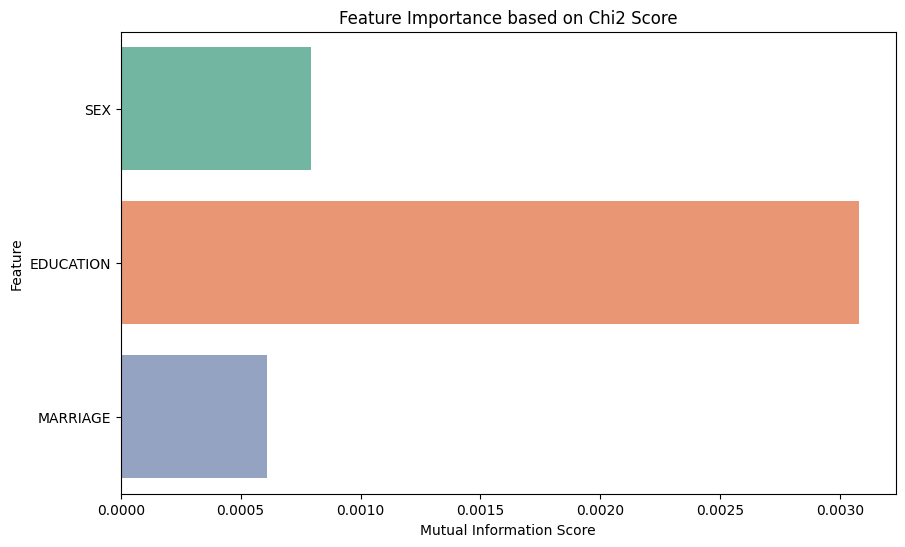

In [88]:
#Visualizing Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(y='Feature' , x = chi_result['Chi2 Score'] , data=feature_importance, palette='Set2')
plt.title('Feature Importance based on Chi2 Score')
plt.show()


#Visualizing Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(y='Feature' , x = mi_result['Mutual Information Score'] , data=feature_importance, palette='Set2')
plt.title('Feature Importance based on Chi2 Score')
plt.show()

In [89]:
numerical_cols = ['LIMIT_BAL' , 'AGE' , 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',"PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]

target = 'default payment next month'

#correlation

num_corr = df1[numerical_cols + [target]].corr()[target].sort_values(ascending=False)
print(num_corr)

default payment next month    1.000000
AGE                           0.013687
BILL_AMT6                    -0.008845
BILL_AMT5                    -0.013471
BILL_AMT4                    -0.016444
BILL_AMT3                    -0.020959
BILL_AMT2                    -0.022782
BILL_AMT1                    -0.029033
PAY_AMT5                     -0.108081
PAY_AMT4                     -0.113716
PAY_AMT6                     -0.114552
PAY_AMT3                     -0.124561
PAY_AMT2                     -0.139699
PAY_AMT1                     -0.143442
LIMIT_BAL                    -0.154380
Name: default payment next month, dtype: float64


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x = df2[categorical_cols + numerical_cols]
y = df2['default payment next month']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x, y)

#Feature Importance from Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature' : x.columns,
    'Importance' : rf.feature_importances_
}).sort_values(by='Importance' , ascending=False)

print(feature_importance_rf)

      Feature  Importance
4         AGE    0.082379
3   LIMIT_BAL    0.080149
11   PAY_AMT1    0.076788
12   PAY_AMT2    0.074202
5   BILL_AMT1    0.073989
6   BILL_AMT2    0.069370
7   BILL_AMT3    0.066830
8   BILL_AMT4    0.063818
10  BILL_AMT6    0.063814
13   PAY_AMT3    0.063269
9   BILL_AMT5    0.061694
14   PAY_AMT4    0.057285
16   PAY_AMT6    0.056689
15   PAY_AMT5    0.055450
1   EDUCATION    0.023596
2    MARRIAGE    0.016566
0         SEX    0.014113


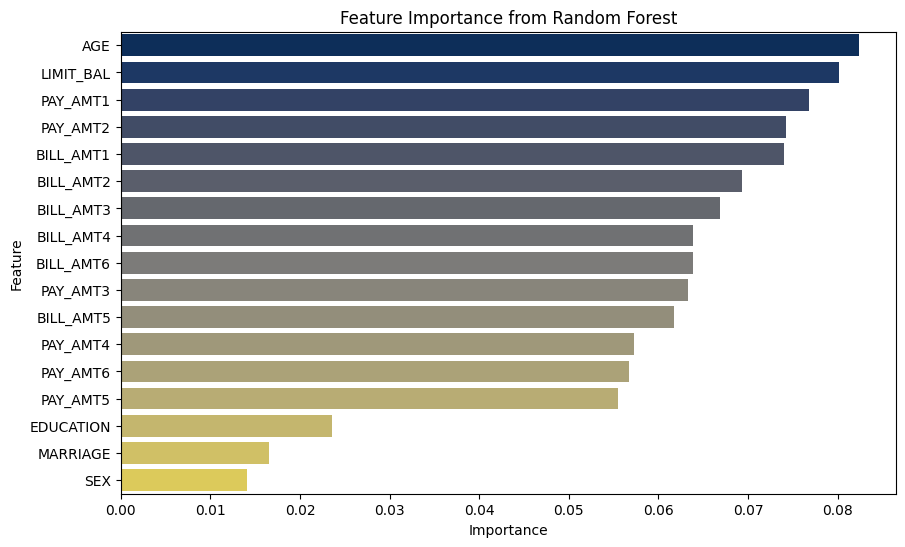

In [91]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance' , y='Feature' , data=feature_importance_rf, palette='cividis')
plt.title('Feature Importance from Random Forest')
plt.show()

From here we can conclude that all the above features except 'MARRAIGE' is important , and hence just for the sake of non-linearity we are keeping the 'marraige' column as well

MODEL PREPERATION


In [92]:
#COMPARING ALL THE MULTIPLE MODELS (LOGISTIC REGRESSION , DECISION TREE , RANDOM FOREST , XGBOOST , GRADIENT BOOSTING , SVM )
#MODEL PREPERATION


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , precision_score , recall_score , f1_score , roc_auc_score 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


In [93]:
#PREPARE THE DATASET

x = df2.drop(columns=['default payment next month'])
y = df2['default payment next month']

#SCALING THE FEATURES

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#SPLITTING THE DATASET
x_train , x_test , y_train , y_test = train_test_split(x_scaled , y , test_size=0.2 , random_state=42 , stratify=y)

In [94]:
#MODELS TO BE COMPARED

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    
}

In [95]:
#Training and Evaluating Models

results = []

for model_name, model in models.items():
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    

    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    })

    results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
    print("\nModel Performance Comparison:\n", results_df)


Model Performance Comparison:
                  Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression     0.814   0.665102  0.320271   0.43235  0.751795

Model Performance Comparison:
                  Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
1        Random Forest    0.8155   0.646277  0.366240  0.467532  0.755068
0  Logistic Regression    0.8140   0.665102  0.320271  0.432350  0.751795

Model Performance Comparison:
                  Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
2    Gradient Boosting    0.8200   0.668486  0.369254  0.475728  0.777131
1        Random Forest    0.8155   0.646277  0.366240  0.467532  0.755068
0  Logistic Regression    0.8140   0.665102  0.320271  0.432350  0.751795

Model Performance Comparison:
                  Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
2    Gradient Boosting  0.820000   0.668486  0.369254  0.475728  0.777131
1        Random Forest  0.815500   0.646277  0.366240  0.4

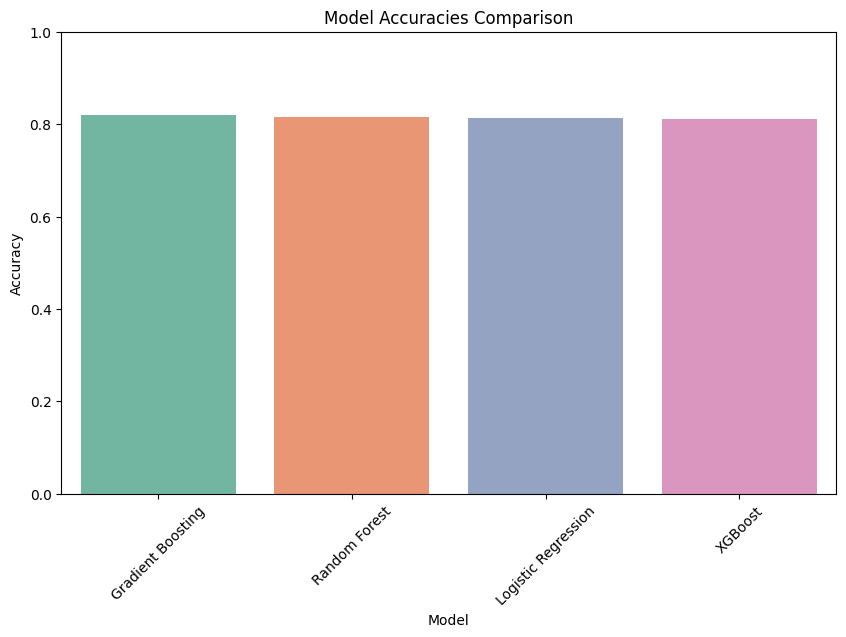

In [96]:
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette='Set2')
plt.title('Model Accuracies Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


 Interpretation

Accuracy: Gradient Boosting is slightly ahead (82% vs ~81%).

Precision: Gradient Boosting has the highest precision (0.668). This means it is better at correctly identifying defaulters when it predicts them.

Recall: All models have low recall (~0.32–0.37). This means they miss many actual defaulters — a critical problem if detecting defaulters is your priority.

F1-Score: Gradient Boosting is best, but still under 0.50 → due to low recall.

ROC-AUC: Gradient Boosting again leads (0.777), meaning better discrimination between classes overall.

DECISION THREASHOLD FOR GRADIENT BOOSTING

In [97]:
#DECISION THREASHOLD FOR GRADIENT BOOSTING

#GET PREDICTED PROBABILITIES

y_probs = models['Gradient Boosting'].predict_proba(x_test)[:, 1]

In [98]:
#TRY DIFFERENT THRESHOLDS
thresholds = [ 0.3]

for t in thresholds:
    y_pred_thresh = (y_probs >=t ).astype(int)
    print(f"\nThreshold: {t}")
    print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
    print("Precision:", precision_score(y_test, y_pred_thresh))
    print("Recall:", recall_score(y_test, y_pred_thresh))
    print("F1-Score:", f1_score(y_test, y_pred_thresh))


Threshold: 0.3
Accuracy: 0.8003333333333333
Precision: 0.5510688836104513
Recall: 0.5244913338357197
F1-Score: 0.5374517374517375


FULLY AUTOMATED MODEL SELECTION + THRESHOLD OPTIMIZATION + HYPERPARAMETER TUNNING